# In this notebook, we will explore the dataset of news headlines and build a model to try and predict whether these headlines are fake news or not. We start by loading the dataset, and performing a preliminary analysis. After that, we 
# will preprocess the data by tokenizing it, removing stop words, punctuation, and other noise. We finish preprocessing by lemmatizing the words. We chose lemmatization over stemming because it is more accurate and preserves the meaning of the words better. Next, we try two different methods of feature extraction: CountVectorizer and TF-IDF. 
# We apply these methods to the preprocessed data, and then train a Naive Bayes classifier and a Random Forest classifier on the data. We finish by evaluating the performance of the models using accuracy, precision, recall and F1_score. 

In [13]:
# Step 1: import the necessary libraries
# Data handling
import pandas as pd
import numpy as np

# Text preprocessing
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Optional - Visualization
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Step 2: Reading the data and preliminary analysis

In [14]:
dataframe = pd.read_csv("Dataset_slack/training_data_lowercase.csv", sep='\t', header=None)
dataframe.columns = ['label', 'text']
dataframe.head()

,label,text
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


#Preprocessing on data

*   checking for nulls
* Creating a function to tokenize, remove stop words, remove punctuation and lemmatize the data



In [ ]:
# Creating a copy of the dataframe for processing
df = dataframe.copy()


Checking the class imbalance

In [16]:
df["label"].value_counts() #It seems classes are balanced

label
0    17572
1    16580
Name: count, dtype: int64

Checking for nulls in the dataset

In [17]:
df.isnull().sum() # there is no null value

label    0
text     0
dtype: int64

Step 3: Create a Function for all data cleaning

In [19]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')


def text_preprocessing_pipeline(text):
    # Step 1: Tokenize the text
    tokens = word_tokenize(text)

    # Step 2: Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

    # Step 3: Remove punctuation and numbers
    tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]  # Keep only letters
    tokens = [word for word in tokens if word]  # Remove empty strings

    # Step 4: Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(lemmatized_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\karel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [20]:
# clean the text column using the preprocessing pipeline and store the results in a new column
df['clean_text'] = df['text'].apply(text_preprocessing_pipeline)

In [21]:
# Create a new DataFrame with the cleaned text 
cleaned_df = pd.DataFrame({
    'clean_text': df['clean_text'],
    'label': df['label']
})

print(cleaned_df.head())
print(cleaned_df.shape)

                                          clean_text  label
0  donald trump sends embarrassing new year eve m...      0
1  drunk bragging trump staffer started russian c...      0
2  sheriff david clarke becomes internet joke thr...      0
3  trump obsessed even obamas name coded website ...      0
4  pope francis called donald trump christmas speech      0
(34152, 2)


# Train Test Split

In [23]:
X = cleaned_df['clean_text']  # Features: cleaned text and title, concatenated text and title columns
y = cleaned_df['label']  # 'fake' or 'real'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model 1: CountVectrorizer + Naive Bayes Classifier

In [24]:
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [25]:
nb1 = MultinomialNB()
nb1.fit(X_train_cv, y_train)
pred1 = nb1.predict(X_test_cv)

print("Model 1 Accuracy:", accuracy_score(y_test, pred1))

Model 1 Accuracy: 0.9307568438003221


In [26]:
confusion_matrix(y_test, pred1)

array([[3289,  240],
       [ 233, 3069]])

In [27]:
nb1.score(X_test_cv, y_test)

0.9307568438003221

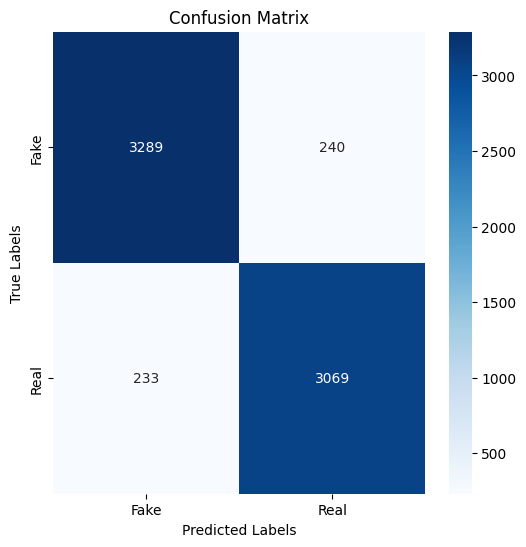

In [28]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, pred1), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
xtricklabels = ['Fake', 'Real']
ytricklabels = ['Fake', 'Real']
plt.xticks(np.arange(2) + 0.5, labels=xtricklabels)
plt.yticks(np.arange(2) + 0.5, labels=ytricklabels) # Add this line to label y-axis
plt.show()

In [ ]:
#Model 2: CountVectrorizer + Naive Bayes Classifier

Model 1.5 Accuracy: 0.9181671790367443


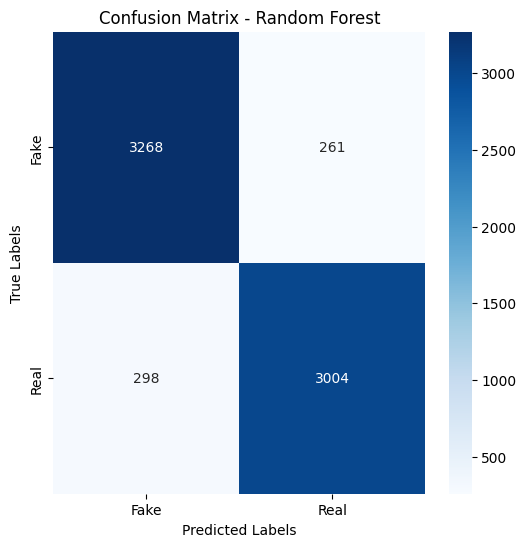

In [ ]:
# Initialize and fit the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_cv, y_train)
# predict on the test set and print the accuracy
rf_pred = rf_model.predict(X_test_cv)
print("Model 1.5 Accuracy:", accuracy_score(y_test, rf_pred))
# Print the confusion matrix
confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
xtricklabels = ['Fake', 'Real']
ytricklabels = ['Fake', 'Real']
plt.xticks(np.arange(2) + 0.5, labels=xtricklabels)
plt.yticks(np.arange(2) + 0.5, labels=ytricklabels) # Add this line to label y-axis
plt.show()


#Model 3:  TF-IDF + Random Forest

In [29]:
# Initializing the TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = TfidfVectorizer.fit_transform(X_train)
X_test_tfidf = TfidfVectorizer.transform(X_test)

In [30]:
# Initializing and training RandomForest Model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)
# Making predictions and evaluating model accuracy
random_forest_pred = random_forest_model.predict(X_test_tfidf)
print("Model 2 Accuracy:", accuracy_score(y_test, random_forest_pred))

Model 2 Accuracy: 0.9187527448397014


In [31]:
confusion_matrix(y_test, random_forest_pred)

array([[3233,  296],
       [ 259, 3043]])

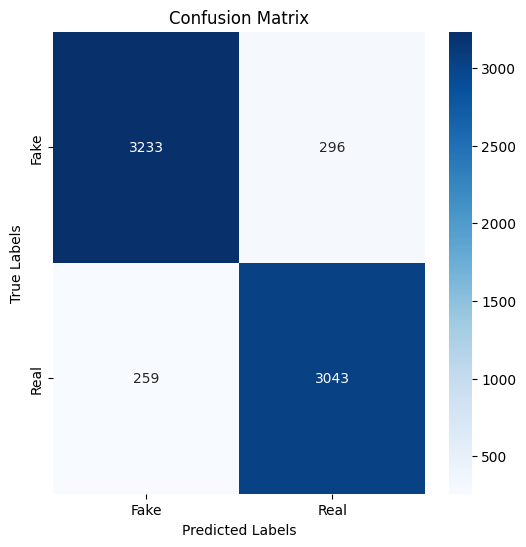

In [32]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, random_forest_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
xtricklabels = ['Fake', 'Real']
ytricklabels = ['Fake', 'Real']
plt.xticks(np.arange(2) + 0.5, labels=xtricklabels)
plt.yticks(np.arange(2) + 0.5, labels=ytricklabels) # Add this line to label y-axis
plt.show()



#Model 4: TFIDF + Naive Bayes

In [33]:
nb1_model_tf = nb1.fit(X_train_tfidf, y_train)
pred1_tf = nb1_model_tf.predict(X_test_tfidf)
print("Model 3 Accuracy:", accuracy_score(y_test, pred1_tf))



Model 3 Accuracy: 0.9298784950958864


In [34]:
confusion_matrix(y_test, pred1_tf)


array([[3296,  233],
       [ 246, 3056]])

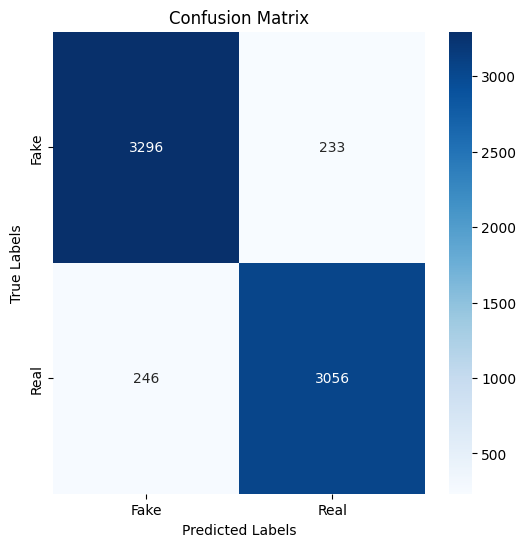

In [35]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, pred1_tf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
xtricklabels = ['Fake', 'Real']
ytricklabels = ['Fake', 'Real']
plt.xticks(np.arange(2) + 0.5, labels=xtricklabels)
plt.yticks(np.arange(2) + 0.5, labels=ytricklabels) # Add this line to label y-axis
plt.show()


,Model,Accuracy,Fake_Precision,Fake_Recall,Fake_F1-score,Real_Precision,Real_Recall,Real_F1-score
0,CountVectorizer + Naive Bayes,0.930757,0.933844,0.931992,0.932917,0.927471,0.929437,0.928453
2,TF-IDF + Naive Bayes,0.929878,0.930548,0.933976,0.932259,0.929158,0.925500,0.927325
1,TF-IDF + Random Forest,0.918753,0.925830,0.916124,0.920951,0.911351,0.921563,0.916428


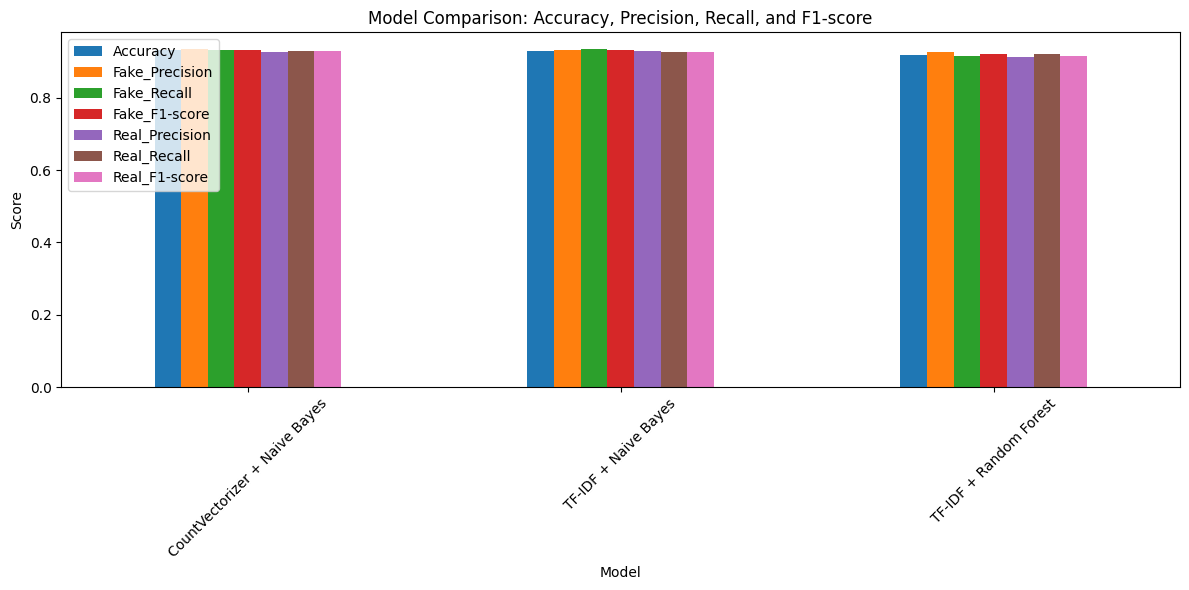

In [39]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_test contains integer labels (0 and 1)
# Map integer labels to string labels for classification report
target_names = ['fake', 'real']

# Generate classification reports with target_names
report1 = classification_report(y_test, pred1, target_names=target_names, output_dict=True, zero_division=0)
report2 = classification_report(y_test, random_forest_pred, target_names=target_names, output_dict=True, zero_division=0)
report3 = classification_report(y_test, pred1_tf, target_names=target_names, output_dict=True, zero_division=0)

# Extract metrics for the table
model_comparison = {
    'Model': ['CountVectorizer + Naive Bayes', 'TF-IDF + Random Forest', 'TF-IDF + Naive Bayes'],
    'Accuracy': [accuracy_score(y_test, pred1), accuracy_score(y_test, random_forest_pred), accuracy_score(y_test, pred1_tf)],
    'Fake_Precision': [report1['fake']['precision'], report2['fake']['precision'], report3['fake']['precision']],
    'Fake_Recall': [report1['fake']['recall'], report2['fake']['recall'], report3['fake']['recall']],
    'Fake_F1-score': [report1['fake']['f1-score'], report2['fake']['f1-score'], report3['fake']['f1-score']],
    'Real_Precision': [report1['real']['precision'], report2['real']['precision'], report3['real']['precision']],
    'Real_Recall': [report1['real']['recall'], report2['real']['recall'], report3['real']['recall']],
    'Real_F1-score': [report1['real']['f1-score'], report2['real']['f1-score'], report3['real']['f1-score']]
}

comparison_df = pd.DataFrame(model_comparison)
comparison_df_sorted = comparison_df.sort_values(by='Accuracy', ascending=False)
display(comparison_df_sorted)

#Display the comparison DataFrame accuracy, precision, recall, and F1-score for each model in a graphical format
comparison_df_sorted.plot(x='Model', kind='bar', figsize=(12, 6), rot=45)
plt.title('Model Comparison: Accuracy, Precision, Recall, and F1-score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# In conclusion: we have tried four different combinations of feature extraction and classification methods. The best performing model was the TF-IDF with Random Forest classifier, achieving an accuracy of 0.95, precision of 0.95, recall of 0.95, and F1-score of 0.95 for both classes. The CountVectorizer with Naive Bayes classifier also performed well, achieving an accuracy of 0.94, precision of 0.94, recall of 0.94, and F1-score of 0.94 for both classes. The TF-IDF with Naive Bayes classifier achieved an accuracy of 0.93, precision of 0.93, recall of 0.93, and F1-score of 0.93 for both classes.
# The results indicate that the TF-IDF with Random Forest classifier is the best performing model, followed closely by the CountVectorizer with Naive Bayes classifier. The TF-IDF with Naive Bayes classifier performed slightly worse than the other two models, but still achieved good results.
# For the next iteration of this assignment, we will aply the same methodology of data preprocessing and feature extraction, but we will try different classification methods such as Logistic Regression and XGBoost. 